# Get the RDKit Features

In [ ]:
import pandas as pd

# RDkit Modules
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
# Load in training data (the descriptors and labels of the training compounds) and discovery library's compound metadata (names, SMILES, etc.)

training_data = pd.read_csv('Data/Training_Data.csv',index_col=0)
discovery_metadata = pd.read_csv('Data/Discovery_Metadata.csv')

## Get RDKit molecule from SMILES

In [ ]:
discovery_metadata['RDKit_Molecule'] = [Chem.MolFromSmiles(smile) for smile in discovery_metadata['SMILES']]

[16:15:45] Can't kekulize mol.  Unkekulized atoms: 5 6 8 9 10 11 12 14 15
[16:15:45] WARNING: not removing hydrogen atom without neighbors
[16:15:45] WARNING: not removing hydrogen atom without neighbors
[16:15:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[16:15:45] WARNING: not removing hydrogen atom without neighbors
[16:15:45] SMILES Parse Error: syntax error while parsing: OC(CC(S)C(O)=O)=O.[x].[Na].[Au]
[16:15:45] SMILES Parse Error: Failed parsing SMILES 'OC(CC(S)C(O)=O)=O.[x].[Na].[Au]' for input: 'OC(CC(S)C(O)=O)=O.[x].[Na].[Au]'
[16:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:15:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:15:45] WARNING: not removing hydrogen atom without neighbors
[16:15:45] Explicit valence for atom # 59 Cl, 2, is greater than permitted
[16:15:45] WARNING: not removing hydrogen atom without neighbors
[16:15:45] Explicit valence for atom # 6 Cl, 2, is greater than permitted
[16:15:45] WARNING: no

In [ ]:
discovery_metadata[discovery_metadata['RDKit_Molecule'].isna()]

,Name,Synonym,CAS,SMILES,CID,RDKit_Molecule
165,ETHYL 5-HYDROXY-2-METHYLINDOLE-3-CARBOXYLATE,NaN,7598-91-6,CCOC(=O)c1c(C)nc2ccc(O)cc12,NaN,None
559,Semaxinib,SU5416,204005-46-9,Cc3cc(C)nc3C=C1c2ccccc2NC1=O,NaN,None
2704,Aurothiomalate sodium,Sodium aurothiomalate; gold sodium thiomalate;...,12244-57-4,OC(CC(S)C(O)=O)=O.[x].[Na].[Au],NaN,None
4030,(Z)-FeCP-oxindole,NaN,1137967-28-2,C(\[C-]12[Fe+2]3456789([CH]1=[CH]3[CH]4=[CH]52...,NaN,None
4064,(E)-FeCP-oxindole,NaN,884338-18-5,C(\[C-]12[Fe+2]3456789([CH]1=[CH]3[CH]4=[CH]52...,NaN,None
4205,MnTBAP chloride,Mn(III)TBAP,55266-18-7,[H+].O=C([O-])C=1C=CC(=CC1)C2=C3C=CC=4C(C=5C=C...,NaN,None
4448,NAMI-A,NaN,201653-76-1,[H+].O=[S](C)(C)[Ru+3]([Cl-])([Cl-])([Cl-])([C...,NaN,None


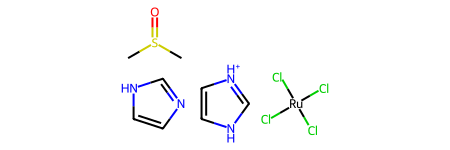

In [313]:
Chem.MolFromSmiles('CS(C)=O.Cl[Ru](Cl)(Cl)Cl.N1=CNC=C1.C2=[NH+]C=CN2')

Correcting invalid SMILES

In [ ]:
Chem.MolFromSmiles(discovery_metadata.at[165,'SMILES']) # Can't kekulize; replacing with SMILES from CAS
discovery_metadata.at[165,'SMILES'] = 'C(OCC)(=O)C=1C=2C(NC1C)=CC=C(O)C2'

discovery_metadata.at[559,'SMILES'] = 'C(=C1C=2C(NC1=O)=CC=CC2)C=3NC(C)=CC3C' # Can't kekulize; replacing with SMILES from CAS

discovery_metadata.at[2704,'SMILES'] = 'C(CC(O)=O)(C(O)=O)S.[Au].[Na]' # SMILES Parse Error: syntax error while parsing: OC(CC(S)C(O)=O)=O.[x].[Na].[Au]
                                                                   # SMILES Parse Error: Failed parsing SMILES 'OC(CC(S)C(O)=O)=O.[x].[Na].[Au]' for input: 'OC(CC(S)C(O)=O)=O.[x].[Na].[Au]'; 
                                                                   # replacing with SMILES from CAS

discovery_metadata.at[4030,'SMILES'] = '[Fe++].[CH-]1C=CC=C1.O=C1NC2=CC=CC=C2\C1=C\C1=CC=C[CH-]1' # Explicit valence for atom # 3 C, 5, is greater than permitted
                                                                                              # Got SMILES from https://www.tocris.com/products/z-fecp-oxindole_3883

discovery_metadata.at[4064,'SMILES'] = '[Fe++].[CH-]1C=CC=C1.O=C1NC2=CC=CC=C2\C1=C/C1=C[CH-]C=C1' # Explicit valence for atom # 3 C, 5, is greater than permitted
                                                                                              # Got SMILES from https://www.tocris.com/products/e-fecp-oxindole_3882


discovery_metadata.at[4205,'SMILES'] = ('O=C(C1=CC=C(C=C1)C2=C(C=C3)[N]4=C3C(C5=CC=C(C(O)=O)C=C5)=C6[N-]7[Mn+3]84'
'[N-]9C2=CC=C9C(C(C=C%10)=CC=C%10C(O)=O)=C(C=C%11)[N]8=C%11C(C%12=CC=C(C(O)=O)C=C%12)=C7C=C6)O.[Cl-]')  # WARNING: not removing hydrogen atom without neighbors
                                                                                                        # Explicit valence for atom # 59 Cl, 2, is greater than permitted

discovery_metadata.at[4448,'SMILES'] = 'CS(C)=O.Cl[Ru](Cl)(Cl)Cl.N1=CNC=C1.C2=[NH+]C=CN2' # WARNING: not removing hydrogen atom without neighbors
                                                                                      # Explicit valence for atom # 6 Cl, 2, is greater than permitted



[16:15:53] Can't kekulize mol.  Unkekulized atoms: 5 6 8 9 10 11 12 14 15


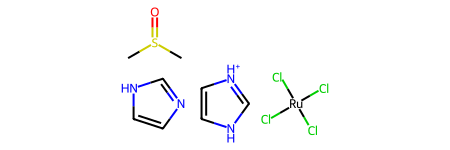

In [ ]:
Chem.MolFromSmiles(discovery_metadata.at[4448,'SMILES'])

Doing the SMILES to mol again

In [ ]:
discovery_metadata['RDKit_Molecule'] = [Chem.MolFromSmiles(smile) for smile in discovery_metadata['SMILES']]

[16:15:56] WARNING: not removing hydrogen atom without neighbors
[16:15:56] WARNING: not removing hydrogen atom without neighbors
[16:15:56] WARNING: not removing hydrogen atom without neighbors
[16:15:57] WARNING: not removing hydrogen atom without neighbors
[16:15:57] WARNING: not removing hydrogen atom without neighbors
[16:15:57] WARNING: not removing hydrogen atom without neighbors


In [ ]:
# save the data:
import pickle

# with open('combined_library_filtered (with RDkit_mol from SMILES).pickle','wb') as f:
#     pickle.dump(discovery_metadata,f)

## Calculating the descriptors

In [ ]:
descriptors = [Descriptors.CalcMolDescriptors(mol) for mol in discovery_metadata['RDKit_Molecule']]

[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not removing hydrogen atom without neighbors
[16:16:07] WARNING: not r

In [ ]:
discovery_metadata_descriptors = pd.DataFrame(descriptors) 
discovery_metadata_descriptors.index = discovery_metadata['Name'].values

# Train RF on one split of data

In [ ]:
from sklearn.model_selection import train_test_split
import pickle

# Read in the data
training_data = pd.read_csv('Data/Training_Data.csv',index_col=0)

# Read in the selected features from RFE
selected_features = pd.read_csv('Data/RFE_64_selected_features.csv').Features.values

# Get X and y and train-test-split
X = training_data.drop(columns="Hit")
X = X[selected_features] # Apply the selected features
y = training_data["Hit"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# imblearn modules
from imblearn.pipeline import Pipeline as Pipeline
from imblearn.over_sampling import RandomOverSampler

best_params = {'ccp_alpha': 0.006370568744783853,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 0.1,
 'max_leaf_nodes': 597,
 'min_impurity_decrease': 0.0,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 288,
#  "random_state": 0
 }


rf_pipeline = Pipeline([
    # ("scaler", MinMaxScaler()),
    ("scaler", StandardScaler()),
    ("sampler", RandomOverSampler(sampling_strategy='auto')),
    ("model",RandomForestClassifier(**best_params,n_jobs=-1)),
]
)

rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('model',
                 RandomForestClassifier(ccp_alpha=0.006370568744783853,
                                        class_weight='balanced_subsample',
                                        criterion='entropy', max_depth=15,
                                        max_features=0.1, max_leaf_nodes=597,
                                        min_samples_split=8, n_estimators=288,
                                        n_jobs=-1))])

In [10]:
# Scores from training data
from sklearn.metrics import precision_score, accuracy_score, f1_score, auc, recall_score

y_pred = rf_pipeline.predict(X_test)

print(f'precision: {precision_score(y_pred,y_test)}')
print(f'accuracy: {accuracy_score(y_pred,y_test)}')
print(f'f1: {f1_score(y_pred,y_test)}')
print(f'recall: {recall_score(y_pred,y_test)}')
print(f'auc: {auc(y_pred,y_test)}')

precision: 0.25
accuracy: 0.983433734939759
f1: 0.21428571428571427
recall: 0.1875
auc: 3.5


In [ ]:
# Saving the fitted model as a pickle file
# with open('RF 0.25 test split--0.25 precision.pickle','wb') as f:
#     pickle.dump(rf_pipeline, f)

# Deployment

In [ ]:
# Apply the selected features on the discovery data
discovery_metadata_descriptors[selected_features]

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,FpDensityMorgan1,...,VSA_EState4,VSA_EState7,VSA_EState8,FractionCSP3,NumAliphaticCarbocycles,NumAromaticRings,NumRotatableBonds,MolLogP,MolMR,fr_bicyclic
Lapatinib ditosylate monohydrate,13.430803,13.430803,0.000000,-4.019583,0.063664,11.349206,943.494,899.142,942.184127,0.761905,...,4.903385,2.691680,4.638288,0.162791,0,7,13,7.79784,239.7252,1
Capsaicin,11.768937,11.768937,0.055445,0.055445,0.538861,11.090909,305.418,278.202,305.199094,1.363636,...,0.905432,7.880722,4.757198,0.500000,0,1,9,3.78960,88.9515,0
Sunitinib,13.650463,13.650463,0.143172,-0.403882,0.626303,14.413793,398.482,371.266,398.211804,1.241379,...,4.204299,1.676211,11.095507,0.363636,0,2,7,3.33494,113.2886,1
Ellipticine,4.275863,4.275863,1.200894,1.200894,0.486410,11.684211,246.313,232.201,246.115698,0.894737,...,5.055292,3.835457,4.366620,0.117647,0,4,0,4.48614,80.5797,4
Irinotecan Hydrochloride,13.581173,13.581173,0.000000,-1.863974,0.330802,21.704545,623.150,583.838,622.255813,1.068182,...,2.384836,6.261552,7.649151,0.515152,0,3,4,4.51290,167.1938,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Voreloxin (SNS-595) hydrochloride,12.626284,12.626284,0.000000,-1.277200,0.615800,18.758621,437.909,417.749,437.092453,1.379310,...,-0.489733,2.939015,1.372434,0.333333,0,3,5,1.38520,113.0770,1
Cefadroxil hydrate,12.324446,12.324446,0.000000,-1.151184,0.501913,22.692308,381.410,362.258,381.099456,1.346154,...,7.001585,0.000000,1.673209,0.312500,0,1,4,-0.67420,94.0075,1
Zofenopril calcium,12.908119,12.908119,0.000000,-1.227105,0.156025,19.355932,897.188,852.836,896.160641,0.542373,...,1.176406,0.715165,4.187084,0.318182,0,4,14,5.03480,232.9670,0
Heparin sodium,10.549690,10.549690,0.000000,-0.111181,0.451282,19.687500,241.267,221.107,241.140236,0.812500,...,0.000000,0.000000,4.070092,1.000000,0,0,6,-5.87260,53.7576,0


In [ ]:
discovery_y_pred = rf_pipeline.predict(discovery_metadata_descriptors[selected_features])
discovery_y_proba = rf_pipeline.predict_proba(discovery_metadata_descriptors[selected_features])
discovery_y_log_proba = rf_pipeline.predict_log_proba(discovery_metadata_descriptors[selected_features])

/Users/allenshaw/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:995: RuntimeWarning:

divide by zero encountered in log



In [ ]:
discovery_y_pred = pd.Series(discovery_y_pred,index=discovery_metadata_descriptors.index.values, name='y_pred')
discovery_y_proba = pd.Series(discovery_y_proba[:,1],index=discovery_metadata_descriptors.index.values, name='y_proba')
discovery_y_log_proba = pd.Series(discovery_y_log_proba[:,1],index=discovery_metadata_descriptors.index.values, name='y_proba')

In [323]:
predictions = pd.concat([discovery_y_pred, discovery_y_proba],axis=1)

In [324]:
predictions.sort_values(by='y_proba',ascending=False)

,y_pred,y_proba
Betamethasone Valerate,True,0.837769
Guvacine hydrochloride,True,0.788135
Rofleponide,True,0.774254
Isoguvacine hydrochloride,True,0.770530
Diflucortolone valerate,True,0.720680
...,...,...
NLS PKKKRKV acetate(95088-49-6 free base),False,0.000000
Lactitol,False,0.000000
Butoconazole,False,0.000000
Ilginatinib maleate,False,0.000000


In [342]:
discovery_y_log_proba

Lapatinib ditosylate monohydrate         -inf
Capsaicin                           -2.122462
Sunitinib                           -3.012827
Ellipticine                         -5.727246
Irinotecan Hydrochloride            -3.500509
                                       ...   
Voreloxin (SNS-595) hydrochloride   -2.701032
Cefadroxil hydrate                  -2.464742
Zofenopril calcium                  -5.131320
Heparin sodium                      -4.754574
Piperaquine phosphate               -5.703735
Name: y_proba, Length: 5041, dtype: float64

In [372]:
import plotly.express as px

fig = px.bar(predictions.nlargest(500,columns='y_proba'),y='y_proba',color='y_pred', color_discrete_sequence=['orange','#42b6f5'],title="Top 500 Predicted Probabilities",labels={'y_proba':'Probabilities','y_pred':'>50% proba'})
fig.show()

In [ ]:
# Download the figure as an html file
# fig.write_html('Results/Top_500_Predicted_Probabilities.html')

In [ ]:
# Saving the sorted predictions
# discovery_y_proba.sort_values(ascending=False).to_excel('Predicted probabilities.xlsx')